In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer import Sbopen
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable

In [347]:
# instantiate a parser object
parser = Sbopen()
df_competition = parser.competition()
df_competition.iloc[np.where(df_competition["competition_name"]== "Premier League")]
df_competition.sort_values(by='season_name')
df_competition.to_excel("comp.xlsx")

In [348]:
# 2015-2016 chosen for portfolio
df_match = parser.match(competition_id=2, season_id=27)


In [349]:
lei_matches = df_match.iloc[np.where((df_match.home_team_name == 'Leicester City') | (df_match.away_team_name == 'Leicester City'))]
lei_matches.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name


In [5]:
lei_linepus = []
for i in lei_matches.match_id:
    lei_linepus.append(parser.lineup(i))
lei_lineups = pd.concat(lei_linepus)
lei_lineups.head()

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,3049,Matt Ritchie,Matt Ritchie,30,3754058,28,AFC Bournemouth,201,Scotland
1,3085,Glenn Murray,Glenn Murray,27,3754058,28,AFC Bournemouth,68,England
2,3304,Harry Arter,Harry Arter,8,3754058,28,AFC Bournemouth,109,Ireland
3,3341,Steve Cook,Steve Cook,3,3754058,28,AFC Bournemouth,68,England
4,3343,Dan Gosling,Dan Gosling,4,3754058,28,AFC Bournemouth,68,England


In [7]:
df_event, df_related, df_freeze, df_tactics = parser.event(3754146)

# exploring the data
df_event.info()
#df_related.info()
#df_freeze.info()
#df_tactics.info()
print(df_event.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3316 entries, 0 to 3315
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3316 non-null   object 
 1   index                           3316 non-null   int64  
 2   period                          3316 non-null   int64  
 3   timestamp                       3316 non-null   object 
 4   minute                          3316 non-null   int64  
 5   second                          3316 non-null   int64  
 6   possession                      3316 non-null   int64  
 7   duration                        2493 non-null   float64
 8   match_id                        3316 non-null   int64  
 9   type_id                         3316 non-null   int64  
 10  type_name                       3316 non-null   object 
 11  possession_team_id              3316 non-null   int64  
 12  possession_team_name            33

In [8]:
df_event[df_event.outcome_name.isna() == False].outcome_name.value_counts()

Incomplete         497
Complete            35
Out                 27
Won                 21
Success In Play     20
Lost In Play        11
Lost Out            11
Unknown             10
Off T                9
Success              5
Saved                5
Tactical             5
Pass Offside         5
No Touch             4
Goal                 4
Blocked              2
Wayward              2
Touched Out          1
In Play Danger       1
Success Out          1
In Play Safe         1
Injury               1
Name: outcome_name, dtype: int64

In [9]:
# METRICS
# rakip ceza sahasında buluşma
# 

In [10]:
pitch = Pitch(pitch_type="statsbomb",pitch_color='#40A03F', stripe_color='#389C39', line_color='white', stripe=True, corner_arcs=True,line_zorder=3)
pitch_gray = Pitch(pitch_type="statsbomb",pitch_color='#C1C1C1', line_color='black', stripe=False, corner_arcs=True,line_zorder=2)
#C1C1C1
#fig, ax = pitch.draw(figsize=(10, 7.727))

490


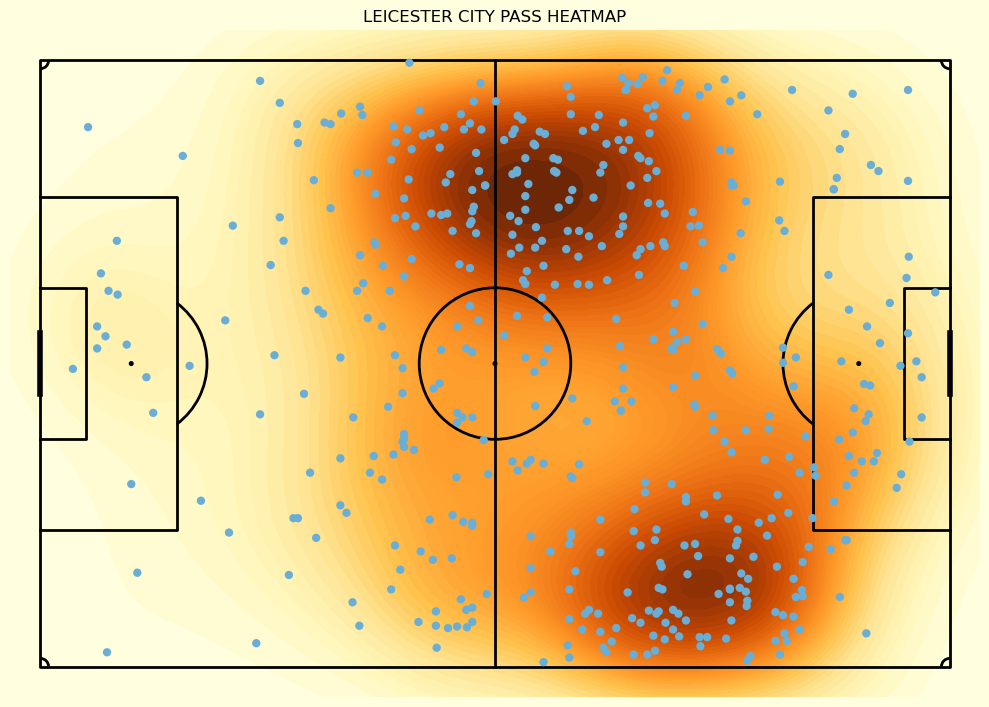

In [317]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
plt.gca().invert_yaxis()
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event['team_name'] == 'Leicester City')]
print(len(df_ball_receipts))
# Plot the pass receipt locations
#pitch.scatter(, df_passes['end_y'], s=20, color='purple',alpha=.6 ,ax=ax)

#sns.scatterplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.6, palette='Set1',zorder=2, legend=False)
sns.scatterplot(x='x', y='y', data=df_ball_receipts, hue='team_name', ec=None,alpha=1, palette='Blues',zorder=3, legend=False)
sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="YlOrBr",zorder=1)#FFFEDF

plt.title("LEICESTER CITY PASS HEATMAP")
plt.show()

In [11]:
df_ball_receipts = df_event
df_ball_receipts.columns
df_ball_receipts[["x","y","end_x","end_y","timestamp","period"]].sort_values(by=["period","timestamp"]).iloc[0].values
for i in range(0,50):
    print(i,df_ball_receipts.sort_values(by=["period","timestamp"]).iloc[i].values)
df_ball_receipts[["x","y","end_x","end_y","timestamp","period"]].sort_values(by=["period","timestamp"]).iloc[46]

0 ['abe07942-dd71-49ca-a050-6cc715371edd' 1 1 datetime.time(0, 0) 0 0 1 0.0
 3754146 35 'Starting XI' 30 'Stoke City' 1 'Regular Play' 30 'Stoke City'
 '4231' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
1 ['a15c3562-71fd-4043-9c45-cfccd99fc31f' 2 1 datetime.time(0, 0) 0 0 1 0.0
 3754146 35 'Starting XI' 30 'Stoke City' 1 'Regular Play' 22
 'Leicester City' '442' nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
2 ['0ef78b4a-57e0-4ab8-b396-cf2206987636' 3 1 datetime.time(0, 0) 0 0 1 0.0
 3754146 18 'Half Start' 30 'Stoke City' 1 'Regular Play' 22
 'Leicester City' None nan nan nan nan nan nan nan nan nan nan

x                       67.2
y                       72.4
end_x                   61.7
end_y                   72.7
timestamp    00:01:13.165000
period                     1
Name: 46, dtype: object

Text(0.5, 1.0, 'Jamie Vardy Ball Receipts')

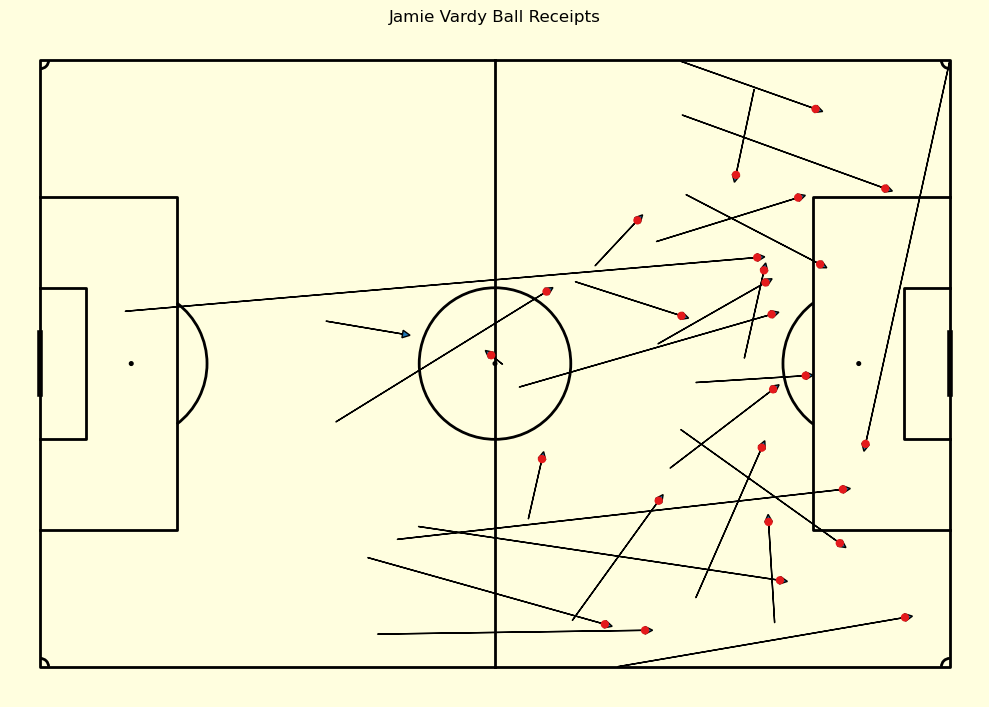

In [12]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_ball_receipts = df_event[(df_event['type_name'] == 'Pass')&(df_event['team_name'] == 'Leicester City')&(df_event['pass_recipient_name'] == 'Jamie Vardy')&(df_event['outcome_name'].isna())]
sns.scatterplot(x='end_x', y='end_y', data=df_ball_receipts, hue='team_name', ec=None,alpha=1, palette='Set1',zorder=3, legend=False)
plt.arrow(37.7,34.4,47.8-37.7,36.1-34.4,head_width=1, head_length=1,zorder=6)
for i in range(len(df_ball_receipts)):
    x = df_ball_receipts.iloc[i].loc["x"]
    y = df_ball_receipts.iloc[i].loc["y"]
    end_x = df_ball_receipts.iloc[i].loc["end_x"]
    end_y = df_ball_receipts.iloc[i].loc["end_y"]
    plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=2)
plt.title("Jamie Vardy Ball Receipts")

Text(0.5, 1.0, "N''Golo Kanté Pass & Heat Map")

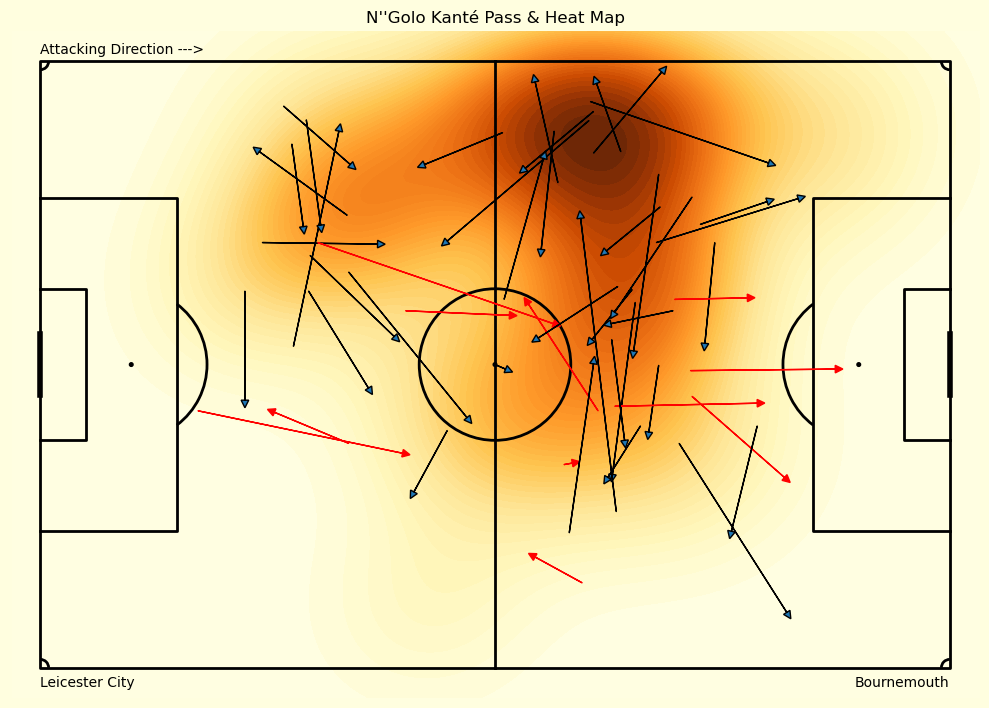

In [13]:
import seaborn as sns
import math
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event['team_name'] == 'Leicester City')&(df_event.player_name == "N''Golo Kanté")]
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event['team_name'] == 'Leicester City')&(df_event.player_name == "N''Golo Kanté")]
#sns.scatterplot(x='x', y='y', data=df_passes, ec=None,alpha=1, palette='Set1',zorder=6, legend=False)
sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="YlOrBr",zorder=1)#FFFEDF
plt.annotate("Attacking Direction --->",(0,-1))
plt.annotate("Leicester City",(0,82.5))
plt.annotate("Bournemouth", xy=(120, 82.5), horizontalalignment='right')

for i in range(len(df_passes)):
    try:
        if math.isnan(df_passes.iloc[i].loc["outcome_name"]):
            x = df_passes.iloc[i].loc["x"]
            y = df_passes.iloc[i].loc["y"]
            end_x = df_passes.iloc[i].loc["end_x"]
            end_y = df_passes.iloc[i].loc["end_y"]
            plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=6)
    except:
        x = df_passes.iloc[i].loc["x"]
        y = df_passes.iloc[i].loc["y"]
        end_x = df_passes.iloc[i].loc["end_x"]
        end_y = df_passes.iloc[i].loc["end_y"]
        plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=6,color='red')
plt.title(f"{df_passes.player_name.max()} Pass & Heat Map")

In [560]:

df_passes[df_passes.x > 114].pass_recipient_name


782    Jamie Vardy
Name: pass_recipient_name, dtype: object

In [19]:
shots[shots.outcome_name == "Goal"]

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,substitution_replacement_name,foul_committed_penalty,foul_won_penalty,foul_committed_card_id,foul_committed_card_name,block_deflection,block_offensive,bad_behaviour_card_id,bad_behaviour_card_name,dribble_nutmeg
594,828804f8-b591-4f5c-b320-291b68ea1fbb,595,1,00:12:10.099000,12,10,35,0.706765,3754146,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
846,86bd2955-975e-44a4-89b5-4d6f188103b9,847,1,00:19:34.193000,19,34,48,0.898526,3754146,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,7bcc1989-6517-4cb8-ab6b-43dabbabe492,1885,2,00:05:43.209000,50,43,104,0.544937,3754146,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2455,be72462b-bdd4-4981-83d4-161439a5065b,2456,2,00:23:22.503000,68,22,146,1.052415,3754146,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
# Import adjustText library
from adjustText import adjust_text

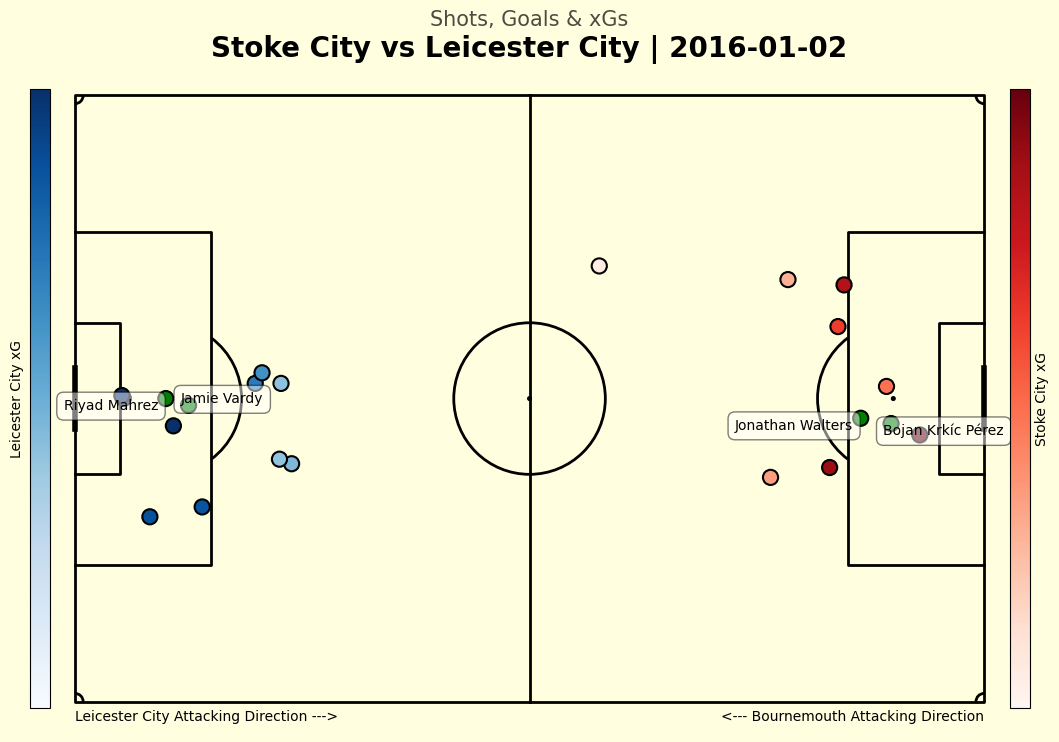

In [339]:
match_id_required = 3754146
home_team_required = lei_matches[lei_matches.match_id == match_id_required].home_team_name.reset_index(drop=True)[0]
away_team_required = lei_matches[lei_matches.match_id == match_id_required].away_team_name.reset_index(drop=True)[0]
pitchLengthX = 120
pitchWidthY = 80
shots = df_event[df_event.type_name == 'Shot']

figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
home_team_required
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event['team_name'] == 'Leicester City')&(df_event.player_name == "N''Golo Kanté")]
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event['team_name'] == 'Leicester City')&(df_event.player_name == "N''Golo Kanté")]
#sns.scatterplot(x='x', y='y', data=df_passes, ec=None,alpha=1, palette='Set1',zorder=6, legend=False)
#sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="YlOrBr",zorder=1)#FFFEDF
plt.Circle((114,50),4,color="blue",zorder=6)
plt.annotate("",(0,-1))
plt.annotate("Leicester City Attacking Direction --->",(0,82.5))
plt.annotate("<--- Bournemouth Attacking Direction", xy=(120, 82.5), horizontalalignment='right')
goal_coor = []
# Create lists to store text annotations
home_goal_annotations = []
away_goal_annotations = []

# Loop through shots and plot them
for i, shot in shots.iterrows():
    x = shot.x
    y = shot.y
    goal = shot.outcome_name == 'Goal'
    team_name = shot.team_name
    circleRadius = figSizeX * 0.1
    circleLineWidth = circleRadius * 1.5
    
    if team_name == home_team_required:
        if goal:
            goal_coor.append((x, y))
            shotCircle = mpatches.Circle((x, pitchWidthY - y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            # Store goal scorer's name for annotation
            home_goal_annotations.append((shot.player_name, x - 1, pitchWidthY - y + 1))
        else:
            cmap = plt.get_cmap('Reds')
            shotCircle = mpatches.Circle((x, pitchWidthY - y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
    elif team_name == away_team_required:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY-y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            # Store goal scorer's name for annotation
            away_goal_annotations.append((shot.player_name, pitchLengthX - x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Blues')
            shotCircle = mpatches.Circle((pitchLengthX - x, y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
            
adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in home_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})
adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in away_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})


# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
patch = mpatches.Patch(color='grey', label='manual patch')   
line = Line2D([0], [0], label='manual line', color='k')
point = Line2D([0], [0], label='manual point', marker='s', markersize=10, 
         markeredgecolor='r', markerfacecolor='k', linestyle='')
circ = mpatches.Circle((0,0), radius=circleRadius,edgecolor="k", linewidth=circleRadius*1.5)
# add manual symbols to auto legend
handles.extend([patch, line, point,circ])

# Create a colorbar for Leicester City ('Blues') on the left side
cmap_blue = plt.get_cmap('Blues')
norm_blue = plt.Normalize(vmin=0, vmax=1)  # Modify the limits as needed
sm_blue = ScalarMappable(cmap=cmap_blue, norm=norm_blue)
sm_blue.set_array([])

# Create a separate axis for the Leicester City colorbar
cbar_ax_blue = fig.add_axes([0.0,0.1,0.02,.8])  # Adjust the position and size as needed
cbar_blue = plt.colorbar(sm_blue, cax=cbar_ax_blue)
cbar_blue.set_ticks([])  # Remove the ticks and numbers
cbar_blue.ax.yaxis.set_label_position('left')  # Move the label to the left side of the colorbar
cbar_blue.set_label('Leicester City xG')

# Create a colorbar for Bournemouth ('Reds') on the right side
cmap_red = plt.get_cmap('Reds')
norm_red = plt.Normalize(vmin=0, vmax=1)  # Modify the limits as needed
sm_red = ScalarMappable(cmap=cmap_red, norm=norm_red)
sm_red.set_array([])

# Create a separate axis for the Bournemouth colorbar
cbar_ax_red = fig.add_axes([0.98, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
cbar_red = plt.colorbar(sm_red, cax=cbar_ax_red)
cbar_red.set_ticks([])  # Remove the ticks and numbers
cbar_red.set_label('Stoke City xG')
ax.set_title("Stoke City vs Leicester City | 2016-01-02", fontsize=20, fontweight='bold', loc='center')
fig.text(0.5, 0.99, "Shots, Goals & xGs", ha='center', va='center', fontsize=15, alpha=0.7)
# Show the plot
plt.show()
#plt.legend(handles=handles)



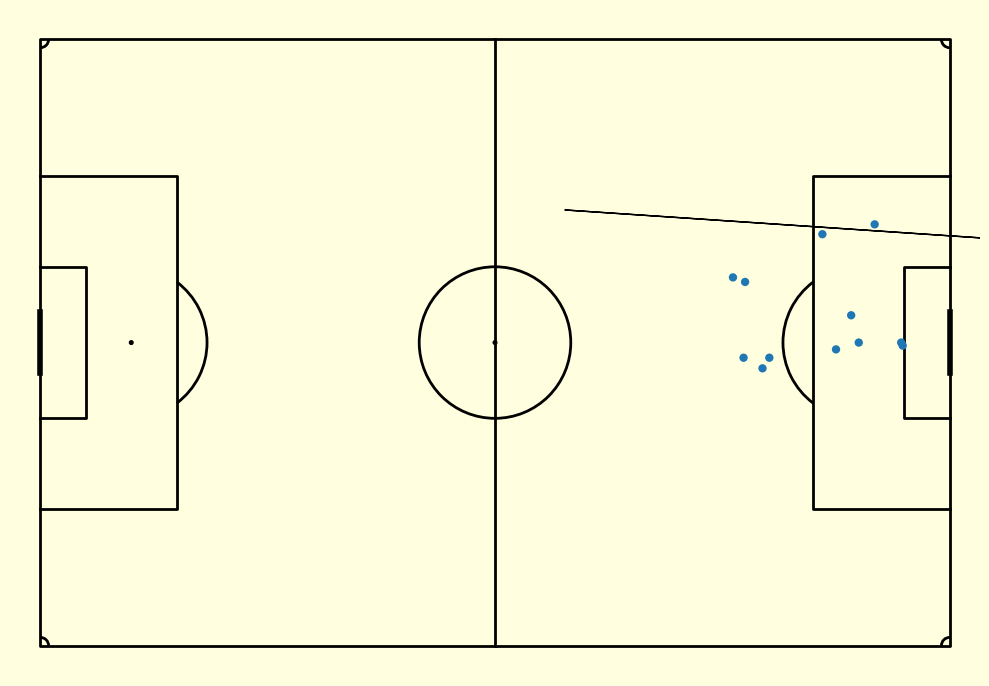

In [340]:
figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
plt.arrow(69.2,57.5,120.0-57.5,53.3-57.5,head_width=1, head_length=1,zorder=6)
shots[shots.shot_statsbomb_xg==  min(shots.shot_statsbomb_xg)][["timestamp","period","player_name","x","y","end_x","end_y"]]
df = shots[shots.team_name == 'Leicester City']
sns.scatterplot(x='x', y='y', data=df, ec=None,alpha=1, palette='Blues',zorder=3, legend=False)
plt.gca().invert_yaxis()

C:\Users\murat\AppData\Local\Temp\ipykernel_22116\3657011878.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm1, label='Colorbar 1')
C:\Users\murat\AppData\Local\Temp\ipykernel_22116\3657011878.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm2, label='Colorbar 2')


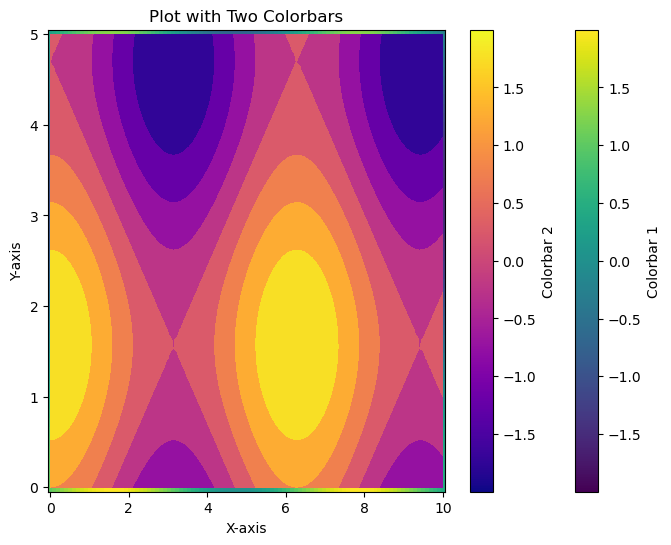

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Generate some example data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) + np.cos(Y)
Z2 = np.cos(X) + np.sin(Y)

# Create a custom color scale and normalize it
norm1 = Normalize(vmin=np.min(Z1), vmax=np.max(Z1))
norm2 = Normalize(vmin=np.min(Z2), vmax=np.max(Z2))

# Create a ScalarMappable for each color scale
cmap1 = plt.get_cmap('viridis')  # Choose a colormap
sm1 = ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])

cmap2 = plt.get_cmap('plasma')  # Choose another colormap
sm2 = ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])

# Create your plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z1, cmap=cmap1, shading='auto')
plt.colorbar(sm1, label='Colorbar 1')

# Add a second color scale to the same plot
plt.contourf(X, Y, Z2, cmap=cmap2)
plt.colorbar(sm2, label='Colorbar 2')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with Two Colorbars')
plt.show()


In [342]:
min(shots.shot_statsbomb_xg)

0.0038485425

In [195]:
goal_arr = np.array(goal_coor)
print(goal_arr)
goal_arr[np.where((goal_arr <=107+1) & (goal_arr >=107-1) )]

shots.shot_statsbomb_xg

[[107.7  36.7]
 [103.7  37.4]]


479     0.047457
497     0.059493
594     0.466867
785     0.018788
846     0.553493
1210    0.027663
1216    0.107173
1240    0.030402
1392    0.057614
1540    0.003849
1577    0.127294
1884    0.783500
1931    0.084619
1952    0.069871
2169    0.041610
2188    0.058197
2194    0.026870
2271    0.022614
2455    0.218477
2670    0.032022
2766    0.055452
3257    0.041740
Name: shot_statsbomb_xg, dtype: float64

212


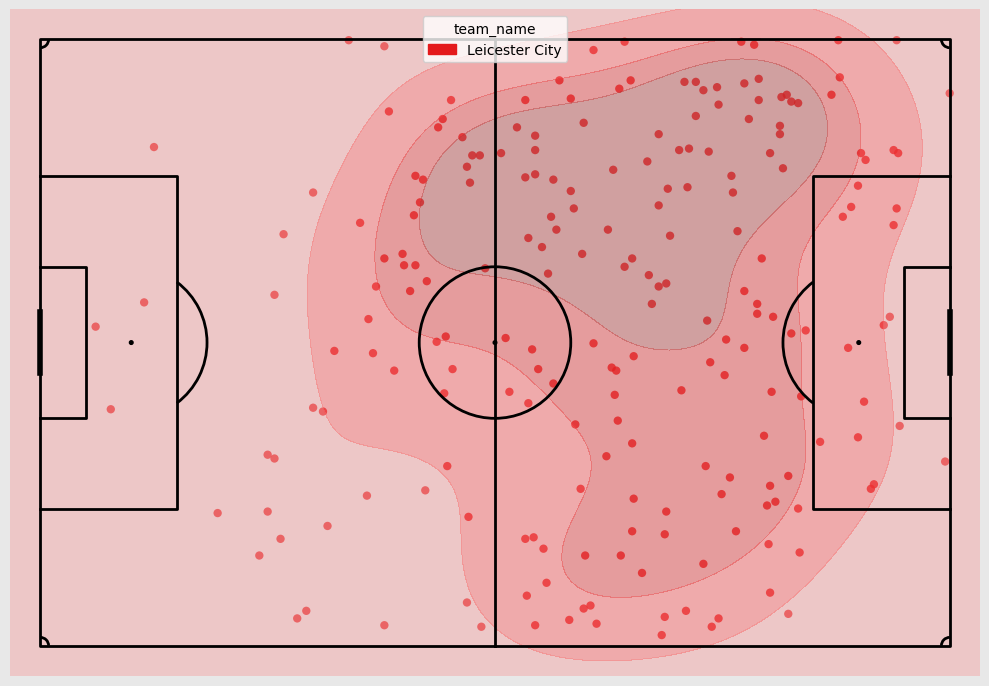

In [16]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#E8E8E8')
ax.patch.set_facecolor('#E8E8E8')
plt.gca().invert_yaxis()
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event['team_name'] == 'Leicester City')&(df_event['period'] == 2)]
print(len(df_passes))
# Plot the pass receipt locations
#pitch.scatter(, df_passes['end_y'], s=20, color='purple',alpha=.6 ,ax=ax)

sns.scatterplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.8, palette='Set1')
sns.kdeplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.4, palette='Set1', fill=True, hade_lowest=False, thresh=0, n_levels=5,cmap='mako',legend=True)


plt.title
plt.show()

307